# Librerías

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Modelado
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Datos



In [2]:
# Importamos el DataSet previamente descargado
dataset = pd.read_csv('AmesHousing.csv')

# Creamos una copia por seguridad.
df = dataset.copy()

In [3]:
# Excluimos las columnas no numéricas
df = df.select_dtypes(exclude=['object'])

In [4]:
# Se crea función para reemplazar los valores faltantes por el promedio
def reemplazar_faltantes_promedio(df):
    for columna in df:
        promedio = df[columna].mean()
        df[columna].fillna(promedio, inplace=True)
    return df

In [5]:
# Reemplazar los valores faltantes por el promedio
df = reemplazar_faltantes_promedio(df)

In [6]:
# Se visualiza el Dataframe
df

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.00000,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.00000,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.00000,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.00000,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.00000,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.00000,7937,6,6,1984,1984,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,69.22459,8885,5,5,1983,1983,0.0,...,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.00000,10441,5,5,1992,1992,0.0,...,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.00000,10010,5,5,1974,1975,0.0,...,240,38,0,0,0,0,0,4,2006,170000


# Modelo PCA

In [7]:
# Se normalizan los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [8]:
# Se ajusta el modelo PCA
modelo_pca = PCA(n_components=16)
modelo_pca.fit(scaled_data)

PCA(n_components=16)

# Interpretación

Una vez finalizado el entrenamiento del objeto PCA, se puede acceder a toda la información de las componentes creadas.

El atributo "components_" almacena los valores de los loadings ϕ que definen cada componente (eigenvector). Las filas representan las componentes principales, ordenadas por su varianza explicada de mayor a menor, y las columnas corresponden a las variables de entrada.

In [9]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.columns
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,-0.018688,-0.108382,-0.018958,0.146841,0.105821,0.284666,-0.081247,0.234300,0.205406,0.191837,...,0.127710,0.137423,-0.068621,0.010717,0.027808,0.034175,0.016305,0.018254,-0.006422,0.316498
1,0.044504,0.063818,0.162611,-0.020055,-0.022392,-0.025947,0.012546,-0.146060,-0.047401,-0.039970,...,-0.066233,0.043191,0.102968,-0.047276,-0.028268,0.004659,-0.009445,0.024402,-0.041626,-0.036188
2,0.111609,0.152742,-0.255465,0.294160,0.297498,-0.117345,0.109082,-0.320767,-0.269336,0.026995,...,0.022250,0.004802,0.217250,0.002191,0.121396,0.146084,0.080237,0.019355,-0.079195,0.020142
3,-0.537421,-0.011980,0.118089,-0.023845,0.025743,-0.026830,0.121832,-0.075220,-0.021401,0.031086,...,0.089914,-0.022877,0.028270,0.010543,0.061256,0.013228,0.032196,-0.156663,0.546649,0.020879
4,-0.412863,-0.061686,-0.237484,0.121753,-0.000736,-0.008174,-0.078566,-0.011357,-0.001088,-0.034264,...,-0.140176,-0.033810,0.028597,0.027429,-0.075580,-0.083006,-0.004123,-0.095995,0.406192,-0.047128
5,0.028283,0.080345,0.338548,-0.107658,-0.070423,-0.109386,-0.346348,0.034270,-0.134106,0.010469,...,-0.075347,-0.076831,-0.019403,-0.046864,-0.149301,-0.026772,0.022037,0.035326,-0.008089,-0.079483
6,0.032496,0.393834,0.117236,-0.171526,-0.049769,0.130986,0.384411,-0.088528,0.317313,-0.196951,...,0.254651,0.086750,0.236347,0.125214,-0.353962,0.127367,0.070643,-0.109164,0.032902,0.064866
7,-0.040558,-0.155006,0.190405,-0.239911,-0.161319,0.047123,0.255230,-0.048097,0.016866,0.133448,...,0.077650,-0.066197,-0.215730,0.177735,0.193698,-0.139358,0.272465,0.280607,0.011543,0.000354
8,-0.003309,0.016661,-0.108140,0.173051,0.211200,-0.149883,-0.133472,0.161243,0.030752,-0.162909,...,0.351107,-0.186949,-0.158174,-0.028131,-0.343913,0.250452,0.005268,-0.051000,0.014224,-0.099369
9,-0.026240,-0.082739,0.268049,-0.189443,-0.160079,0.088443,-0.236676,0.007678,-0.114125,0.075180,...,-0.014384,0.006100,0.253853,-0.359501,0.173581,0.392794,-0.181001,-0.243656,0.009476,0.018132


Es posible analizar visualmente la influencia de las variables en cada componente utilizando un gráfico de tipo heatmap.

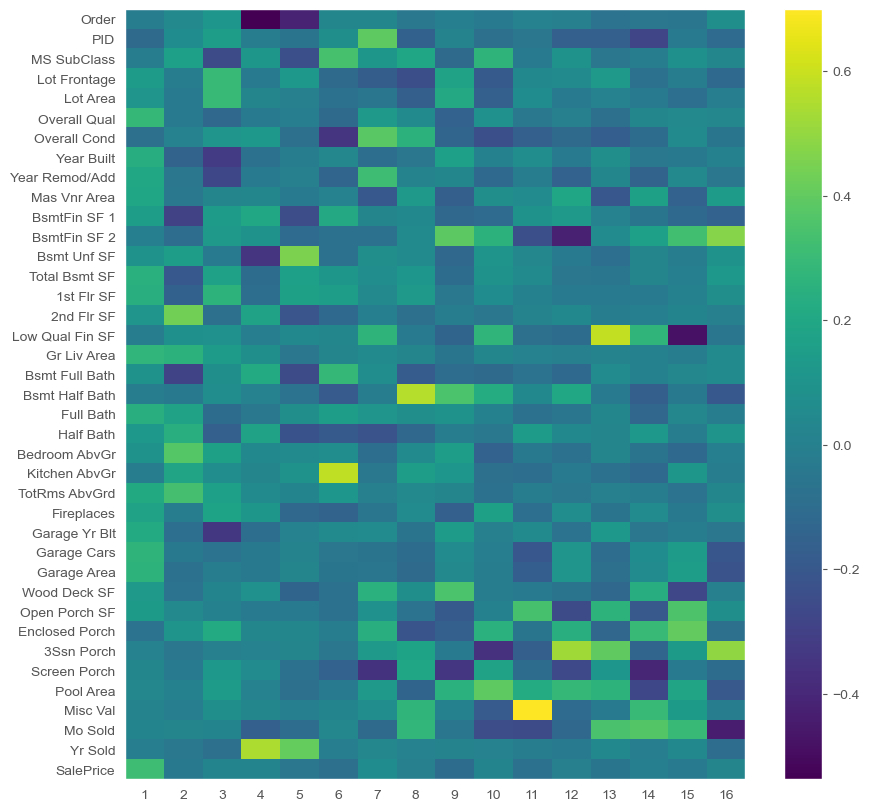

In [10]:
# Heatmap componentes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(16), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Una vez que se han calculado los componentes principales, es posible obtener información sobre la varianza explicada por cada una de ellas, así como la proporción que representan respecto al total y la proporción acumulada de varianza. Esta información se encuentra almacenada en los atributos explained_variance_ y explained_variance_ratio_ del modelo.

Porcentaje de varianza explicada por cada componente: 

[0.20700749 0.08294703 0.06657612 0.05258415 0.05068405 0.03770036
 0.03043974 0.02968475 0.02939575 0.02823019 0.02742127 0.02630024
 0.02556584 0.02464713 0.02404889 0.0235344 ]


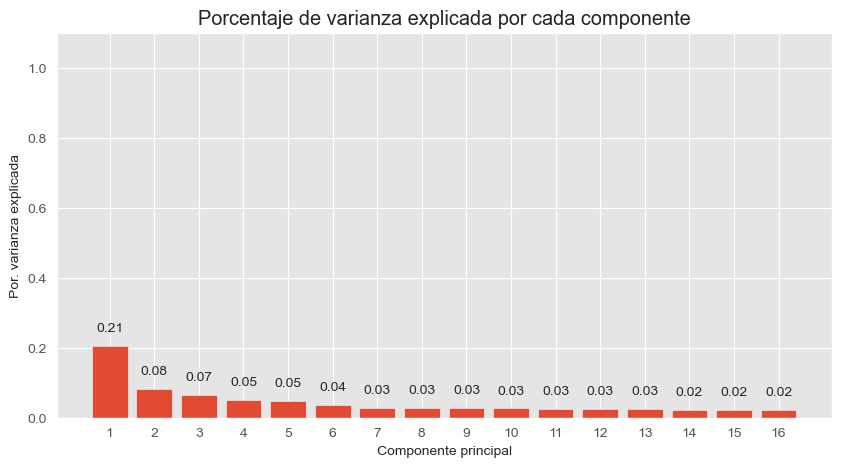

In [11]:
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente: \n')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, el primer componente explica el 21% de la varianza observada en los datos y el segunda el 8%.

Porcentaje de varianza explicada acumulada: 

[0.20700749 0.28995452 0.35653065 0.4091148  0.45979884 0.4974992
 0.52793895 0.55762369 0.58701944 0.61524963 0.6426709  0.66897114
 0.69453698 0.71918411 0.743233   0.76676739]


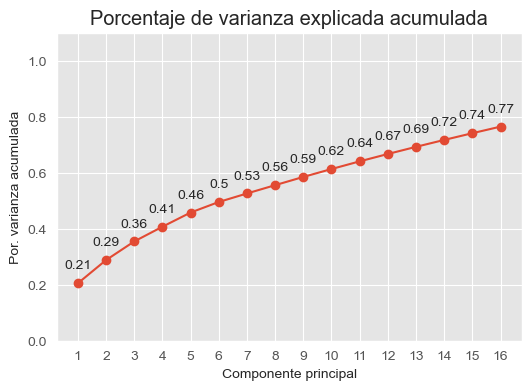

In [12]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada: \n')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(16) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen los 16 componentes se conseguiría explicar el 77% de la varianza observada.